<a href="https://colab.research.google.com/github/GeeksGhost/Football_Predictions/blob/main/Football_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
# Corrected URL to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/GeeksGhost/Football_Project/main/nfl_team_stats_2002-2023.csv"

# Import and read data
game_stats_df = pd.read_csv(url)
game_stats_df.head()


,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-05,49ers,Giants,16,13,13,21,4,...,0,6,0,0,1,3,0,0,27:32,32:28
1,2002,1,2002-09-08,Jets,Bills,37,31,18,26,2,...,0,8,1,1,0,2,2,0,21:06,39:08
2,2002,1,2002-09-08,Vikings,Bears,23,27,19,20,5,...,0,6,1,1,2,1,0,0,31:31,28:29
3,2002,1,2002-09-08,Chargers,Bengals,34,6,27,13,6,...,0,5,0,0,0,1,0,0,37:48,22:12
4,2002,1,2002-09-08,Chiefs,Browns,40,39,24,24,5,...,0,10,0,1,1,0,0,0,30:16,29:44


In [4]:
# Initialize dictionaries to count wins and losses for each team
team_wins = {}
team_losses = {}

# Loop through each game in the dataset
for index, row in game_stats_df.iterrows():
    away_team = row['away']
    home_team = row['home']
    score_away = row['score_away']
    score_home = row['score_home']

    # If away team wins
    if score_away > score_home:
        team_wins[away_team] = team_wins.get(away_team, 0) + 1
        team_losses[home_team] = team_losses.get(home_team, 0) + 1
    # If home team wins
    else:
        team_wins[home_team] = team_wins.get(home_team, 0) + 1
        team_losses[away_team] = team_losses.get(away_team, 0) + 1

# Convert the win/loss data to DataFrames
wins_df = pd.DataFrame(list(team_wins.items()), columns=['Team', 'Wins'])
losses_df = pd.DataFrame(list(team_losses.items()), columns=['Team', 'Losses'])

# Merge the wins and losses DataFrames
win_loss_df = pd.merge(wins_df, losses_df, on='Team', how='outer')

# Display the final DataFrame
win_loss_df.fillna(0, inplace=True)  # Fill missing values with 0 if some teams have only wins/losses
win_loss_df['Wins'] = win_loss_df['Wins'].astype(int)
win_loss_df['Losses'] = win_loss_df['Losses'].astype(int)
win_loss_df.head()

,Team,Wins,Losses
0,49ers,186,191
1,Jets,155,211
2,Bears,166,197
3,Chargers,192,176
4,Chiefs,220,161


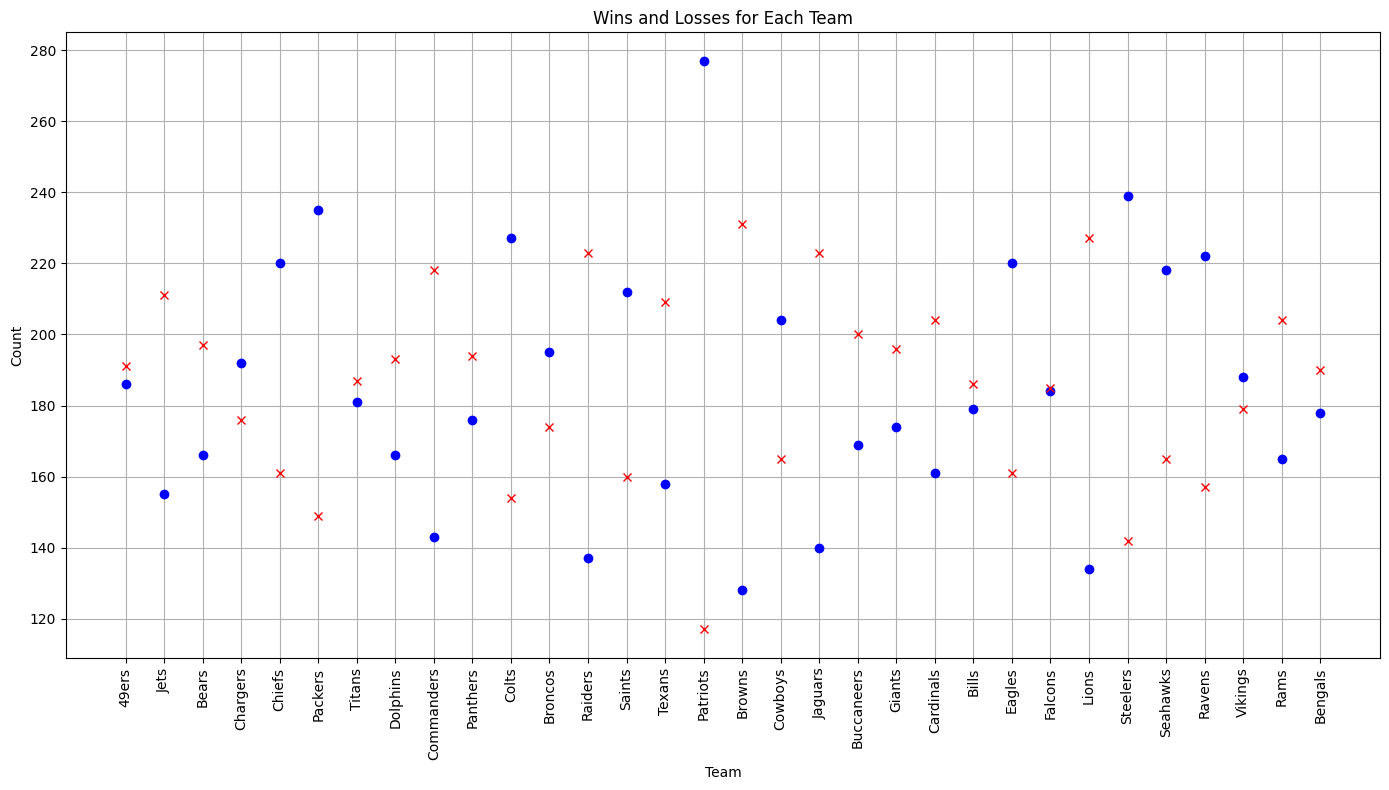

In [ ]:
# Plotting the DataFrame
plt.figure(figsize=(14, 8))

# Plot each team's wins and losses
for index, row in win_loss_df.iterrows():
    team = row['Team']
    wins = row['Wins']
    losses = row['Losses']

    plt.plot([team], [wins], 'o', label=f'{team} Wins' if index == 0 else "", color='blue')
    plt.plot([team], [losses], 'x', label=f'{team} Losses' if index == 0 else "", color='red')

# Set plot labels and title
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Wins and Losses for Each Team')
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Initialize a dictionary to store each team's win/loss DataFrames
team_records = {}

# List of all teams from the dataset
teams = pd.concat([game_stats_df['home'], game_stats_df['away']]).unique()  # Get all unique team names

# Create a structure to hold each team's win and loss DataFrames
for team in teams:
    team_records[team] = {
        'wins': pd.DataFrame(columns=game_stats_df.columns),
        'losses': pd.DataFrame(columns=game_stats_df.columns)
    }

# Loop through each game in the dataset
for index, row in game_stats_df.iterrows():
    away_team = row['away']
    home_team = row['home']
    score_away = row['score_away']
    score_home = row['score_home']

    # Determine the winner and loser, and append the game to their respective win/loss DataFrames
    if score_away > score_home:  # Away team wins
        # Append the row to the away team's win DataFrame
        team_records[away_team]['wins'] = pd.concat([team_records[away_team]['wins'], pd.DataFrame([row])], ignore_index=True)
        # Append the row to the home team's loss DataFrame
        team_records[home_team]['losses'] = pd.concat([team_records[home_team]['losses'], pd.DataFrame([row])], ignore_index=True)
    else:  # Home team wins
        # Append the row to the home team's win DataFrame
        team_records[home_team]['wins'] = pd.concat([team_records[home_team]['wins'], pd.DataFrame([row])], ignore_index=True)
        # Append the row to the away team's loss DataFrame
        team_records[away_team]['losses'] = pd.concat([team_records[away_team]['losses'], pd.DataFrame([row])], ignore_index=True)

# input the team information as needed.
Cowboys_wins = team_records['Cowboys']['wins']
Cowboys_losses = team_records['Cowboys']['losses']

# Display Dallas Cowboys' wins
Cowboys_wins.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,2,2002-09-15,Titans,Cowboys,13,21,19,14,7,...,0,2,0,0,1,0,0,2,35:45,24:15
1,2002,4,2002-09-29,Cowboys,Rams,13,10,17,19,5,...,0,3,1,1,1,2,0,0,31:57,28:03
2,2002,6,2002-10-13,Panthers,Cowboys,13,14,14,17,5,...,0,4,0,1,0,1,0,0,33:36,26:24
3,2002,12,2002-11-24,Jaguars,Cowboys,19,21,19,21,5,...,0,4,2,1,1,2,0,0,27:52,32:08
4,2002,13,2002-11-28,Commanders,Cowboys,20,27,16,19,3,...,0,4,0,0,4,0,0,2,27:02,32:58


In [ ]:
Cowboys_losses.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-08,Cowboys,Texans,10,19,11,13,2,...,0,4,1,0,1,1,0,0,26:05,33:55
1,2002,3,2002-09-22,Cowboys,Eagles,13,44,18,26,4,...,0,7,3,2,1,0,1,0,30:52,29:08
2,2002,5,2002-10-06,Giants,Cowboys,21,17,16,20,6,...,0,6,1,0,1,0,0,0,28:50,31:10
3,2002,7,2002-10-20,Cowboys,Cardinals,6,9,14,22,2,...,0,2,0,1,4,0,0,0,30:57,40:53
4,2002,8,2002-10-27,Seahawks,Cowboys,17,14,18,17,10,...,0,3,0,1,2,0,0,0,32:05,27:55


In [ ]:
Broncos_wins = team_records['Broncos']['wins']
Broncos_losses = team_records['Broncos']['losses']

Broncos_losses.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,4,2002-09-30,Broncos,Ravens,23,34,30,14,5,...,0,6,0,2,3,0,0,0,32:54,27:06
1,2002,6,2002-10-13,Dolphins,Broncos,24,22,16,27,5,...,0,6,1,1,1,2,2,0,25:55,34:05
2,2002,10,2002-11-11,Raiders,Broncos,34,10,20,27,6,...,0,6,0,0,0,1,2,0,28:19,31:41
3,2002,12,2002-11-24,Colts,Broncos,23,20,26,15,15,...,0,5,2,0,1,2,0,0,43:45,21:53
4,2002,13,2002-12-01,Broncos,Chargers,27,30,20,25,2,...,0,10,1,0,2,0,0,0,32:13,39:46


In [ ]:
Cardinals_wins = team_records['Cardinals']['wins']
Cardinals_losses = team_records['Cardinals']['losses']

Cardinals_losses.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-08,Cardinals,Commanders,23,31,14,21,4,...,0,8,0,0,1,1,0,0,25:36,34:24
1,2002,3,2002-09-22,Chargers,Cardinals,23,15,19,15,7,...,0,2,0,1,1,2,2,0,34:17,25:43
2,2002,8,2002-10-27,Cardinals,49ers,28,38,23,18,9,...,0,6,1,0,3,0,0,0,32:27,27:33
3,2002,9,2002-11-03,Rams,Cardinals,27,14,23,13,6,...,0,6,0,2,2,1,0,2,35:28,24:32
4,2002,10,2002-11-10,Seahawks,Cardinals,27,6,27,19,8,...,0,8,0,3,0,2,0,0,32:44,27:16


In [ ]:
Panthers_wins = team_records['Panthers']['wins']
Panthers_losses = team_records['Panthers']['losses']

Panthers_wins.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-08,Ravens,Panthers,7,10,15,15,5,...,0,2,0,0,1,0,0,0,26:09,33:51
1,2002,2,2002-09-15,Lions,Panthers,7,31,12,20,1,...,0,4,1,0,2,0,0,2,26:17,33:43
2,2002,3,2002-09-22,Panthers,Vikings,21,14,20,13,6,...,0,4,0,1,2,4,0,0,35:24,24:36
3,2002,13,2002-12-01,Panthers,Browns,13,6,11,14,5,...,0,5,0,2,2,3,0,0,32:23,27:37
4,2002,14,2002-12-08,Bengals,Panthers,31,52,25,23,6,...,0,9,1,2,0,1,2,4,31:08,28:52


In [ ]:
# Counters for home and away wins
home_wins = 0
away_wins = 0

# Loop through each game in the dataset
for index, row in game_stats_df.iterrows():
    away_team = row['away']
    home_team = row['home']
    score_away = row['score_away']
    score_home = row['score_home']

    # If away team wins
    if score_away > score_home:
        away_wins += 1
    # If home team wins
    elif score_home > score_away:
        home_wins += 1

# Create a DataFrame to store the results
wins_count_df = pd.DataFrame({
    'Game Type': ['Home', 'Away'],
    'Wins': [home_wins, away_wins]
})

wins_count_df.head()

,Game Type,Wins
0,Home,3344
1,Away,2571


In [59]:
# Convert possession time to numeric (in minutes)
game_stats_df['possession_home'] = pd.to_timedelta(game_stats_df['possession_home']).dt.total_seconds() / 60
game_stats_df['possession_away'] = pd.to_timedelta(game_stats_df['possession_away']).dt.total_seconds() / 60

# Create a target column for wins (1 if home team wins, 0 otherwise)
game_stats_df['home_win'] = game_stats_df['score_home'] > game_stats_df['score_away']

def analyze_team_performance(team_name):
    # Filter for games where the team played (either as home or away team)
    team_games = game_stats_df[(game_stats_df['home'] == team_name) | (game_stats_df['away'] == team_name)]

    # Initialize counters for wins and losses against each opponent
    wins = {}
    losses = {}

    # Loop through the filtered games
    for index, row in team_games.iterrows():
        home_team = row['home']
        away_team = row['away']
        score_home = row['score_home']
        score_away = row['score_away']

        # Check if the team was the home team or away team
        if home_team == team_name:
            opponent = away_team
            if score_home > score_away:  # Team won
                wins[opponent] = wins.get(opponent, 0) + 1
            else:  # Team lost
                losses[opponent] = losses.get(opponent, 0) + 1
        elif away_team == team_name:
            opponent = home_team
            if score_away > score_home:  # Team won
                wins[opponent] = wins.get(opponent, 0) + 1
            else:  # Team lost
                losses[opponent] = losses.get(opponent, 0) + 1

    # Convert the results into a DataFrame
    results_df = pd.DataFrame({
        'Opponent': list(set(list(wins.keys()) + list(losses.keys()))),
        f'{team_name} Wins': [wins.get(team, 0) for team in set(list(wins.keys()) + list(losses.keys()))],
        f'{team_name} Losses': [losses.get(team, 0) for team in set(list(wins.keys()) + list(losses.keys()))]
    })

    return results_df

# Example usage
team_name = 'Eagles'  # Replace this with the team you want to analyze
results_df = analyze_team_performance(team_name)

# Print the results
print(results_df)

      Opponent  Eagles Wins  Eagles Losses
0      Cowboys           21             24
1     Panthers            7              4
2      Bengals            0              5
3         Rams            8              2
4       Chiefs            3              4
5        Colts            4              2
6     Dolphins            4              2
7       Ravens            2              3
8     Patriots            3              5
9        Bears            9              4
10      Titans            2              4
11      Texans            6              0
12      Giants           33             14
13     Falcons           11              5
14     Broncos            3              2
15  Buccaneers            5              8
16       Bills            5              1
17      Saints            5              8
18        Jets            6              1
19    Chargers            2              3
20      Browns            4              1
21  Commanders           28             16
22     Jagu

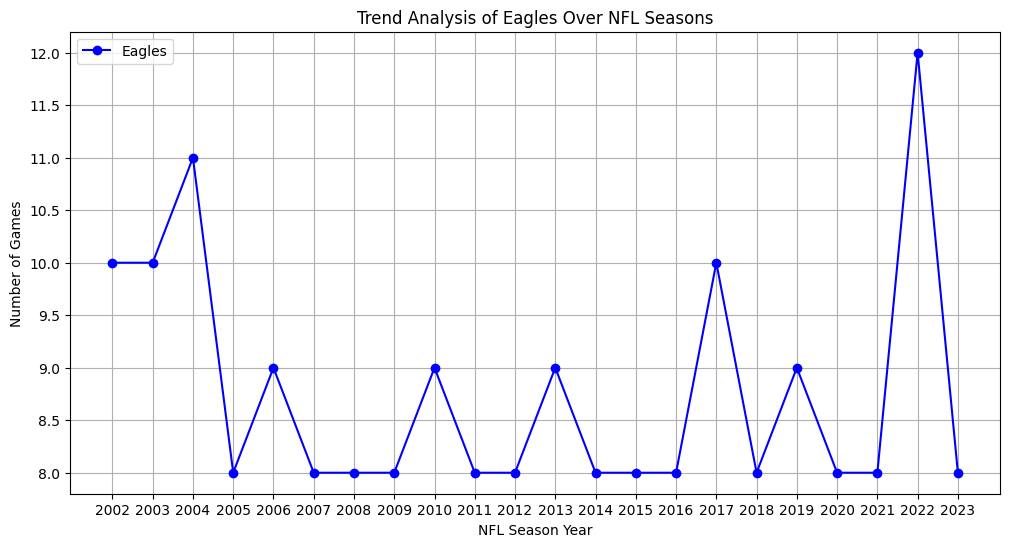

In [64]:
# Convert date to datetime
game_stats_df['date'] = pd.to_datetime(game_stats_df['date'])

# Define a function to assign NFL season year
def get_nfl_season_year(date):
    if date.month >= 9:  # September or later
        return date.year
    else:  # Before September
        return date.year - 1

# Apply the function to create a new 'nfl_season_year' column
game_stats_df['nfl_season_year'] = game_stats_df['date'].apply(get_nfl_season_year)

# Aggregate data by NFL season year and team, e.g., total games
team_performance = game_stats_df.groupby(['nfl_season_year', 'home']).size().reset_index(name='games')

# Create a trend line for a specific team (e.g., "Eagles")
team = 'Eagles'
team_data = team_performance[team_performance['home'] == team]

plt.figure(figsize=(12, 6))
plt.plot(team_data['nfl_season_year'], team_data['games'], marker='o', label=team, color='b')
plt.xlabel('NFL Season Year')
plt.ylabel('Number of Games')
plt.title(f'Trend Analysis of {team} Over NFL Seasons')

# Customize x-axis ticks
plt.xticks(ticks=team_data['nfl_season_year'].unique(), labels=[str(year) for year in team_data['nfl_season_year'].unique()])

plt.legend()
plt.grid(True)
plt.show()

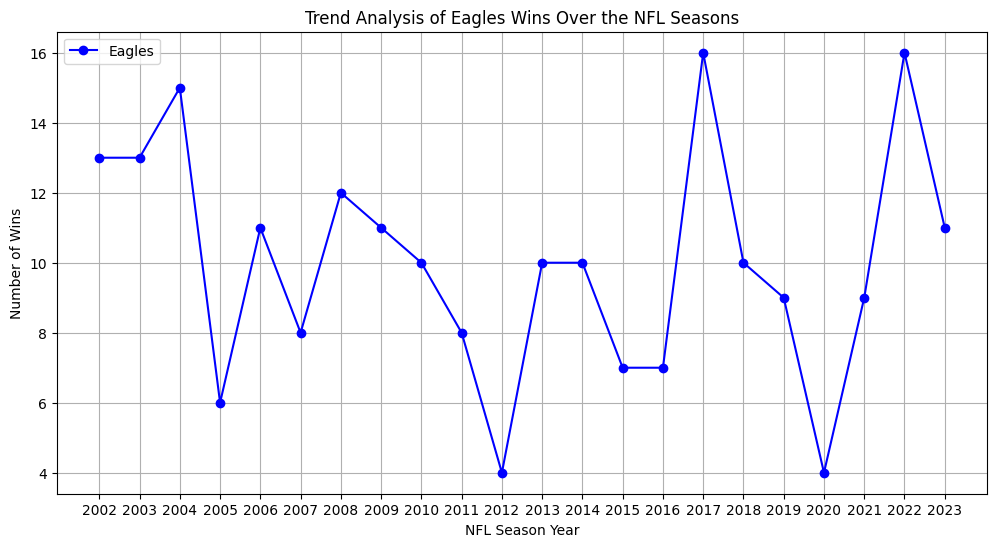

In [63]:
# Convert date to datetime
game_stats_df['date'] = pd.to_datetime(game_stats_df['date'])

# Define a function to assign NFL season year
def get_nfl_season_year(date):
    if date.month >= 9:  # September or later
        return date.year
    else:  # Before September
        return date.year - 1

# Apply the function to create a new 'nfl_season_year' column
game_stats_df['nfl_season_year'] = game_stats_df['date'].apply(get_nfl_season_year)

# Create a target column for classification (1 if home team won, 0 otherwise)
game_stats_df['home_win'] = game_stats_df['score_home'] > game_stats_df['score_away']

# Count wins for home and away teams separately
home_wins = game_stats_df.groupby(['nfl_season_year', 'home'])['home_win'].sum().reset_index(name='wins')
away_wins = game_stats_df.groupby(['nfl_season_year', 'away'])['home_win'].apply(lambda x: (~x).sum()).reset_index(name='wins')

# Rename columns for merging
home_wins.rename(columns={'home': 'team'}, inplace=True)
away_wins.rename(columns={'away': 'team'}, inplace=True)

# Merge home and away wins data
total_wins = pd.merge(home_wins, away_wins, on=['nfl_season_year', 'team'], how='outer')
total_wins['wins'] = total_wins[['wins_x', 'wins_y']].sum(axis=1)
total_wins.drop(columns=['wins_x', 'wins_y'], inplace=True)

# Create a trend line for a specific team (e.g., "Eagles")
team = 'Eagles'
team_data = total_wins[total_wins['team'] == team]

plt.figure(figsize=(12, 6))
plt.plot(team_data['nfl_season_year'], team_data['wins'], marker='o', label=team, color='b')
plt.xlabel('NFL Season Year')
plt.ylabel('Number of Wins')
plt.title(f'Trend Analysis of {team} Wins Over the NFL Seasons')

# Customize x-axis ticks
plt.xticks(ticks=team_data['nfl_season_year'].unique(), labels=[str(year) for year in team_data['nfl_season_year'].unique()])


plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Function to convert "MM:SS" possession time to total minutes
def convert_possession_to_minutes(possession_str):
    minutes, seconds = map(int, possession_str.split(':'))
    total_minutes = minutes + seconds / 60
    return total_minutes

# Convert possession time to numeric (using the custom function)
game_stats_df['possession_home'] = game_stats_df['possession_home'].apply(convert_possession_to_minutes)
game_stats_df['possession_away'] = game_stats_df['possession_away'].apply(convert_possession_to_minutes)
# Create a target column for wins (1 if home team wins, 0 otherwise)
game_stats_df['home_win'] = game_stats_df['score_home'] > game_stats_df['score_away']

Wins DataFrame:
                 2019  2020  2021  2022  2023
NFL Season Year                              
Eagles              9     4     9    16    11
Cowboys             8     6    12    13    12
Giants              4     6     4    10     6
Commanders          3     7     7     9     4


<Figure size 1200x600 with 0 Axes>

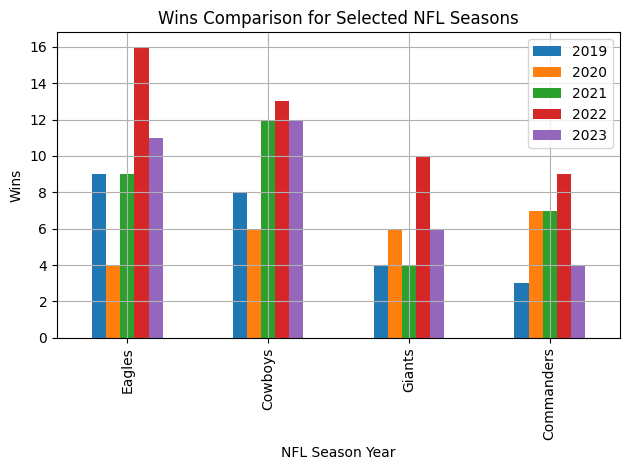

In [66]:
# Convert date to datetime
game_stats_df['date'] = pd.to_datetime(game_stats_df['date'])

# Define a function to assign NFL season year
def get_nfl_season_year(date):
    if date.month >= 9:  # September or later
        return date.year
    else:  # Before September
        return date.year - 1

# Apply the function to create a new 'nfl_season_year' column
game_stats_df['nfl_season_year'] = game_stats_df['date'].apply(get_nfl_season_year)

# Define the NFL seasons to analyze
selected_seasons = [2019, 2020, 2021, 2022, 2023]  # Change this to the NFL season(s) you want to analyze

# Filter the data for the selected NFL seasons
filtered_data = game_stats_df[game_stats_df['nfl_season_year'].isin(selected_seasons)]

# List of teams to compare
teams = ['Eagles', 'Cowboys', 'Giants', 'Commanders']

# Initialize an empty dictionary to store aggregated data
performance_data = {team: {'wins': {}} for team in teams}

# Loop through each team and aggregate data for the selected seasons
for team in teams:
    for season in selected_seasons:
        yearly_data = filtered_data[filtered_data['nfl_season_year'] == season]
        # Filter data for home games
        home_games = yearly_data[yearly_data['home'] == team]
        # Filter data for away games
        away_games = yearly_data[yearly_data['away'] == team]

        # Calculate total wins
        home_wins = home_games['home_win'].sum()
        away_wins = (~away_games['home_win']).sum()
        total_wins = home_wins + away_wins

        if season not in performance_data[team]['wins']:
            performance_data[team]['wins'][season] = 0

        performance_data[team]['wins'][season] += total_wins

# Convert the performance data into a DataFrame for plotting
def create_performance_df(data, metric):
    df = pd.DataFrame.from_dict({team: data[team][metric] for team in teams}, orient='index')
    df.index.name = 'NFL Season Year'
    return df

# Create DataFrames for wins
wins_df = create_performance_df(performance_data, 'wins')

# Print DataFrames for debugging
print("Wins DataFrame:")
print(wins_df)

# Plot the performance comparison
plt.figure(figsize=(12, 6))

# Plot Wins
wins_df.plot(kind='bar', legend=True)
plt.xlabel('NFL Season Year')
plt.ylabel('Wins')
plt.title('Wins Comparison for Selected NFL Seasons')
plt.grid(True)

plt.tight_layout()
plt.show()